# Plotting Option Value

In this notebook, we present code example to plot option values.


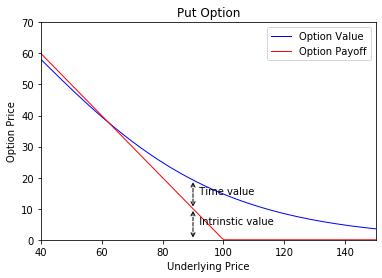

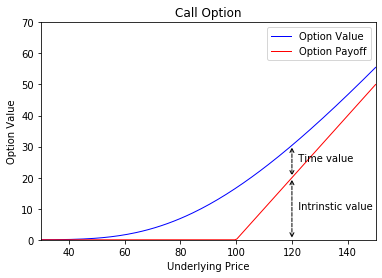

In [3]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

def option_price(spot, strike, vol, tau, r, phi):
    var = vol * np.sqrt(tau)
    d1 = (np.log(spot / strike) + r * tau + 0.5 * var ** 2) / var
    d2 = d1 - var

    v1 = scipy.stats.norm.cdf(phi * d1)
    v2 = scipy.stats.norm.cdf(phi * d2)

    price = phi * (spot * v1 - strike * np.exp(-r * tau) * v2)
    delta = phi * v1

    return price, delta


def option_payoff(spot, strike, phi):
    payoffs = phi * (spot - strike)
    payoffs[payoffs < 0.0] = 0.0
    return payoffs


def plot_call():
    strike = 100
    vol = 0.4
    tau = 1.0
    r = 0.02
    phi = 1.0

    # call options
    spots = np.linspace(0, 150, num=200)
    spots[0] = 0.001
    prices, deltas = option_price(spots, strike, vol, tau, r, phi)

    payoffs = option_payoff(spots, strike, phi)

    #plot
    plt.xlim(30.0, 150.0)
    plt.ylim(0, 70.0)

    l1,  = plt.plot(spots, prices, color='blue', lw=1)
    l2,  = plt.plot(spots, payoffs, color='red', lw=1)

    spot = np.array([120.0])
    p1 = option_payoff(spot, strike, phi)[0]
    p2 = option_price(spot, strike, vol, tau, r, phi)[0]

    plt.annotate('', xy=(spot[0], 0.0), xycoords='data',
                 xytext=(spot[0], p1), textcoords='data',
                 arrowprops=dict(color='k', arrowstyle='<->', ls='dashed'))

    plt.annotate('  Intrinstic value', xy=(spot[0], p1/2), xycoords='data',
                 textcoords='data', ha='left')

    plt.annotate('', xy=(spot[0], p1), xycoords='data',
                 xytext=(spot[0], p2), textcoords='data',
                 arrowprops=dict(color='k', arrowstyle='<->', ls='dashed'))

    plt.annotate('  Time value', xy=(spot[0], (p1 + p2) / 2), xycoords='data',
                 textcoords='data', ha='left')

    plt.title('Call Option')
    plt.xlabel('Underlying Price')
    plt.ylabel('Option Value')
    plt.legend([l1, l2], ('Option Value', 'Option Payoff'))
    plt.show()


def plot_put():
    strike = 100
    vol = 0.4
    tau = 1.0
    r = 0.02
    phi = -1.0

    # call options
    spots = np.linspace(0, 150, num=200)
    spots[0] = 0.001
    prices, deltas = option_price(spots, strike, vol, tau, r, phi)

    payoffs = option_payoff(spots, strike, phi)

    #plot
    plt.xlim(40.0, 150.0)
    plt.ylim(0, 70.0)

    l1, = plt.plot(spots, prices, color='blue', lw=1)
    l2, = plt.plot(spots, payoffs, color='red', lw=1)

    spot = np.array([90.0])

    p1 = option_payoff(spot, strike, phi)[0]
    p2 = option_price(spot, strike, vol, tau, r, phi)[0]

    plt.annotate('', xy=(spot[0], 0.0), xycoords='data',
                 xytext=(spot[0], p1), textcoords='data',
                 arrowprops=dict(color='k', arrowstyle='<->', ls='dashed'))

    plt.annotate('  Intrinstic value', xy=(spot[0], p1/2), xycoords='data',
                 textcoords='data', ha='left')

    plt.annotate('', xy=(spot[0], p1), xycoords='data',
                 xytext=(spot[0], p2), textcoords='data',
                 arrowprops=dict(color='k', arrowstyle='<->', ls='dashed'))

    plt.annotate('  Time value', xy=(spot[0], (p1 + p2) / 2), xycoords='data',
                 textcoords='data', ha='left')

    plt.title('Put Option')
    plt.xlabel('Underlying Price')
    plt.ylabel('Option Price')
    plt.legend([l1, l2], ('Option Value', 'Option Payoff'))

    plt.show()

plot_put()
plot_call()